<a href="https://colab.research.google.com/github/Dasrunaik/AssignMents-ExcelR/blob/main/Assignment_19_NLP_and_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data loading

In [28]:
import pandas as pd
import numpy as np

In [29]:
df=pd.read_csv('/content/blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [30]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [31]:
df['Labels'].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
comp.os.ms-windows.misc,100
comp.sys.ibm.pc.hardware,100
comp.sys.mac.hardware,100
comp.windows.x,100
misc.forsale,100
rec.autos,100
rec.motorcycles,100


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [33]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,alt.atheism
freq,1,100


In [34]:
df.isnull().sum()

,0
Data,0
Labels,0


Text Preprocessing

In [35]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned'] = df['Data'].astype(str).apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 Feature Extraction

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned'])
y = df['Labels']

Train/Test Split & Naive Bayes Classification

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [40]:
y_pred = model.predict(X_test)


In [41]:
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.med', 'sci.crypt',
       'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'alt.atheism', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'alt.atheism', 'rec.sport.baseball', 'rec.sport.baseball',
       'comp.windows.x', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.med', 'sci.electronics',
       'rec.sport.hockey', 'comp.os.ms-windows.misc', 'sci.electronics',
       'soc.religion.christian', 'comp.os.ms-windows.misc',
       'comp.windows.x', 'soc.religion.christian', 'r

Confusion Matrix

In [42]:
print(confusion_matrix(y_test, y_pred))

[[14  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  2]
 [ 0 15  0  0  0  0  2  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0 19  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 20  0  0  1  0  0  0  0  2  1  0  0  0  0  0  0  0]
 [ 0  0  0  1 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  2  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  0  1  0 11  1  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  2  0  0  0  0  1  0  0 12  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  1  1  0  0  0  0 18  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0

**Classification**

In [43]:
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.47      0.78      0.58        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.79      0.86      0.83        22
comp.sys.ibm.pc.hardware       0.87      0.80      0.83        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.92      0.88      0.90        25
            misc.forsale       0.79      0.61      0.69        18
               rec.autos       0.94      0.94      0.94        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.82      1.00      0.90        18
        rec.sport.hockey       1.00      1.00      1.00        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.75      0.75      0.75        16
                 sci.med       0.88      0.88      0.88        17
         

Sentiment Analysis

In [44]:
from textblob import TextBlob


In [45]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [46]:
df['Sentiment'] = df['Data'].astype(str).apply(get_sentiment)

Sentiment

In [47]:
print(df['Sentiment'].value_counts())

Sentiment
positive    1543
negative     457
Name: count, dtype: int64


Sentiment Distribution Across Categories

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

Plotting sentiment

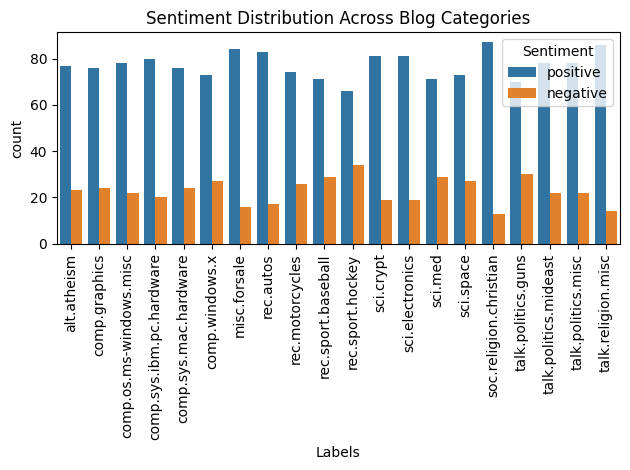

In [49]:
sns.countplot(data=df, x='Labels', hue='Sentiment')
plt.xticks(rotation=90)
plt.title('Sentiment Distribution Across Blog Categories')
plt.tight_layout()
plt.show()